In [1]:
from models import dqn
import tensorflow as tf
from tensorflow import keras

from collections import deque
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


episodes = 1000  # number of episodes to run
initialize = 300  # initial time steps before start updating

from chain_mdp import ChainMDP
from agent_chainMDP import agent
# recieve 1 at rightmost stae and recieve small reward at leftmost state
env = ChainMDP(10)
agent = agent(load_model=None)
s = env.reset()

rrecord = []
totalstep = 0
for ite in range(episodes):
    obs = env.reset()
    done = False
    rsum = 0
    while not done:
        totalstep +=1
        action = agent.action(obs)
        next_obs,reward,done,info = env.step(action)
        rsum += reward
        experience = (obs,action,reward,next_obs,done)
        agent.buffer.append(experience)

        if totalstep>initialize:
            agent.train(totalstep)
        obs = next_obs
                        
################################################################################
    ## DO NOT CHANGE THIS PART!
    rrecord.append(rsum)
    if ite % 200 == 0:
        print('iteration {} ave reward {}'.format(ite, np.mean(rrecord[-10:])))
    
    ave100 = np.mean(rrecord[-100:])   
    if  ave100 > 17.5:
        print("Solved after %d episodes."%ite)
        break

2022-06-08 03:49:55.634558: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


initialize model
iteration 0 ave reward 0.002
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2022-06-08 03:49:57.102439: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-06-08 03:49:57.103083: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-06-08 03:49:57.133659: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2022-06-08 03:49:57.133685: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: iron
2022-06-08 03:49:57.133692: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: iron
2022-06-08 03:49:57.133777: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 510.73.5
2022-06-08 03:49:57.133798: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 510.47.3
2022-06-08 03:49:57.133804:

iteration 200 ave reward 0.0
iteration 400 ave reward 10.0
iteration 600 ave reward 10.0
iteration 800 ave reward 5.2


In [2]:
agent.save("./saved_models/chain/")

2022-06-08 03:51:40.741037: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./saved_models/chain/Qprincipal/assets
INFO:tensorflow:Assets written to: ./saved_models/chain/Qtarget/assets


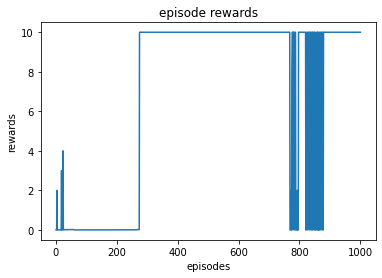

In [3]:
# plot [episode, reward] history
x = [i+1 for i in range(len(rrecord))]
plt.plot(x, rrecord)
plt.title('episode rewards')
plt.xlabel('episodes')
plt.ylabel('rewards')
plt.show()

In [5]:
from agent_chainMDP import agent

agent_load = agent()

load model :  ./saved_models/chain/
trying load ./saved_models/chain/Qprincipal
trying load ./saved_models/chain/Qtarget


## Test code

In [6]:
from agent_chainMDP import agent
#from agent_chainMDP import Agent


# recieve 1 at rightmost stae and recieve small reward at leftmost state
env = ChainMDP(10)
s = env.reset()

""" Your agent"""
#agent = agent()

done = False
cum_reward = 0.0
# always move right left: 0, right: 1
action = 1
while not done:    
    action = agent_load.action(s)
    ns, reward, done, _ = env.step(action)
    cum_reward += reward
    s = ns
print(f"total reward: {cum_reward}")


total reward: 10.0
